In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def Henon_Map(y, a, b):
    xn, yn = y
    return [1 - a*xn**2 + yn, b*xn]

In [3]:
# Hénon map parameters (chaotic regime)
a0 = 1.4 
b = 0.3
N = 1000
epsilon = 0.05
K = 0.5

In [5]:
xs = (-0.7 + np.sqrt(0.7**2 + 4*1.4))/(2*1.4)
ys = 0.3*xs

In [6]:
xs, ys

(0.6313544770895047, 0.1894063431268514)

In [7]:
xi, yi = xs, ys
for i in range(100):
    xi, yi = Henon_Map([xi, yi], a0, b)

In [8]:
xi, yi

(0.6313544770895048, 0.18940634312685142)

In [9]:
J = np.array( [[-2 * a0 * xs, 1], [b, 0] ])
df_da = np.array([[-xs**2], [0]])
B = df_da

In [10]:
eigvals, eigvecs = np.linalg.eig(J)

In [11]:
eigvals, eigvecs

(array([-1.92373886,  0.15594632]),
 array([[-0.98805776, -0.46122777],
        [ 0.15408397, -0.88728178]]))

In [29]:
vs = np.expand_dims(eigvecs[:,0], -1)
vu = np.expand_dims(eigvecs[:,1], -1)

In [30]:
np.shape(B), np.shape(vs)

((2, 1), (2, 1))

In [31]:
B*vs

array([[0.3938482],
       [0.       ]])

In [32]:
np.dot(vs.T, B)[0]

array([0.3938482])

In [60]:
dzn = np.ones([2,1])
s = 0.05

In [61]:
np.shape(np.dot(J, dzn)), np.shape(vs), np.shape(vs.T)

((2, 1), (2, 1), (1, 2))

In [62]:
def control(dzn, J, vs, s):
    c = np.dot(vs.T, s*vs - np.dot(J, dzn)).item()/np.dot(vs.T, B).item()
    return c

In [66]:
x = np.zeros(N)
y = np.zeros(N)
a = np.ones(N) * a0

N = 2000
for n in range(N-1):
    dzn = np.zeros([2,1])
    dzn[0] = x[n] - xs
    dzn[1] = y[n] - ys
    dist = np.sqrt( (x[n] - xs)**2 + (y[n] - ys)**2 )
    if dist < epsilon:
        c = control(dzn, J, vs, s)
        a[n + 1] = a0 + c
    
    x[n + 1] = 1 - a[n + 1] * x[n] ** 2 + y[n]
    y[n + 1] = b * x[n]    

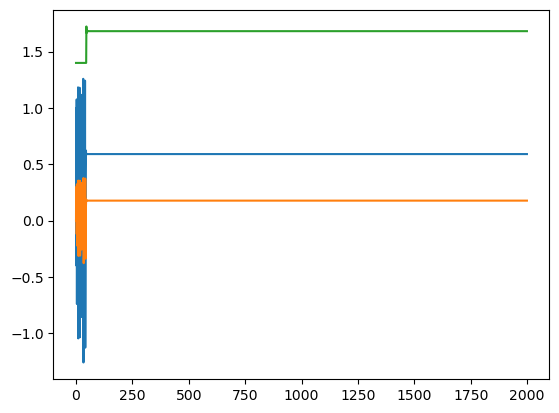

In [68]:
plt.plot(x)
plt.plot(y)

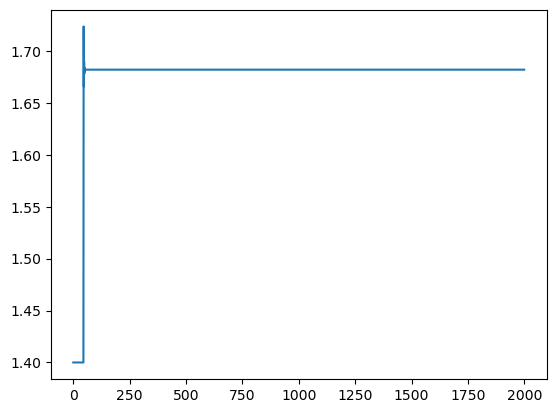

In [69]:
plt.plot(a)